# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.

### Objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business. 

### Data Dictionary

order_id         : Unique ID of the order
customer_id      : ID of the customer who ordered the food
restaurant_name  : Name of the restaurant
cuisine_type     : Cuisine ordered by the customer
cost_of_the_order: Price paid per order
day_of_the_week  : Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
rating           : Rating given by the customer out of 5
food_preparation_time  : Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
delivery_time    : Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [464]:
#importing necessary libraries for the project
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Understanding the structure of the data

In [467]:
# reading the data from datasets
df = pd.read_csv("/Users/sunnyluffy/AI/data/foodhub_order.csv")

#getting the structure of dataset
df.shape

(1898, 9)

#### Observations:
There are total of 1898 rows and 9 columns in df.

In [470]:
#viewing the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [472]:
#listing datatypes of the different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are four columns of type int64 (numeric integers).
One column of type float64 (numeric floating-point).
Four columns of type object, which are likely strings or categorical data.

In [475]:
# Checking for missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [477]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Statistics for food_preparation_time:

The shortest time it takes to prepare food is 20 minutes.
On average, it takes about 27.37 minutes to prepare the food.
The longest time it takes to prepare food is 35 minutes.

The Standard Deviation indicates that the preparation time vary by about 4.63 minutes from the mean i.e,average.
25% of the food orders have a preparation time of 23 minutes or less.
The median food preparation time is 27 minutes, which tells us that half of the orders have a preparation time below 27 minutes and other half takes more time.
75% of the orders have a preparation time of 31 minutes or less.


In [480]:
# Checking for NaN values in the rating column (missing ratings)
not_given = df[df['rating'] == 'Not given']

# Count the number of no ratings
count_not_given = not_given.shape[0]

print(f"Number of orders with no ratings: {count_not_given}")

Number of orders with no ratings: 736


#### Observations:
A significant number of missing ratings could indicate gaps in customer feedback, which may affect the quality of insights derived from customer sentiment.
Investigating when and why these ratings are missing.
Consider strategies to handle the missing data, such as imputation or follow-up reminders. Also, investigate alternative sources of feedback (sms) and improve engagement practices to ensure more complete and reliable data for analysis.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

Text(0.5, 0, 'Food Preparation Time (minutes)')

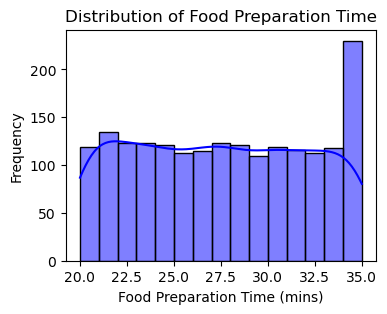

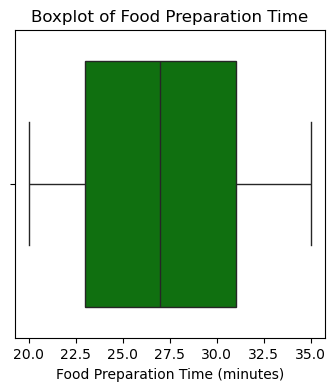

In [485]:
# Histogram for food preparation time
plt.figure(figsize=(4, 3))
sns.histplot(df['food_preparation_time'], kde=True, color='blue', bins=15)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (mins)')
plt.ylabel('Frequency')
# Boxplot for food preparation time to see outliers
plt.figure(figsize=(4, 4))
sns.boxplot(x=df['food_preparation_time'], color='green')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')

Text(0.5, 0, 'Delivery Time (mins)')

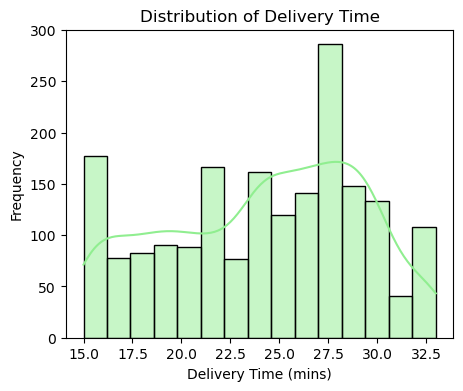

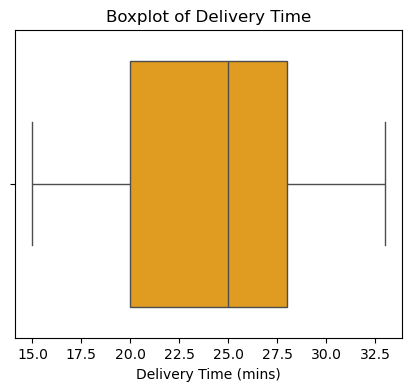

In [487]:
# Histogram for delivery time
plt.figure(figsize=(5, 4))
sns.histplot(df['delivery_time'], kde=True, color='lightgreen', bins=15)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (mins)')
plt.ylabel('Frequency')

# Boxplot for delivery time to check for outliers
plt.figure(figsize=(5, 4))
sns.boxplot(x=df['delivery_time'], color='orange')
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (mins)')

Text(0.5, 0, 'Cost of the Order ($)')

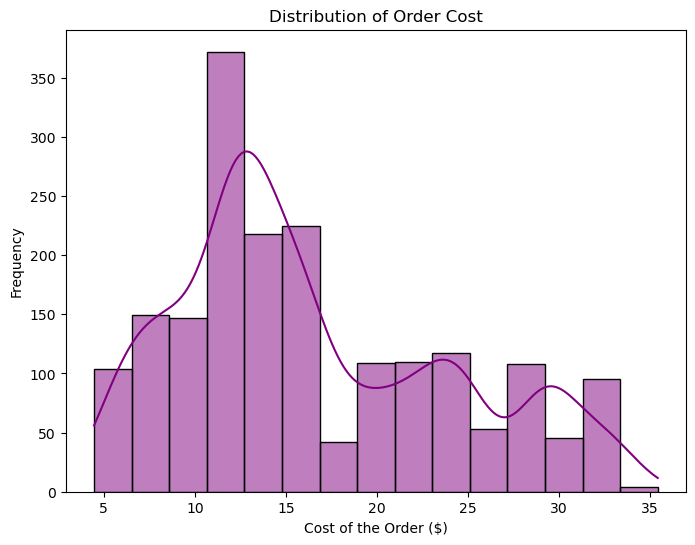

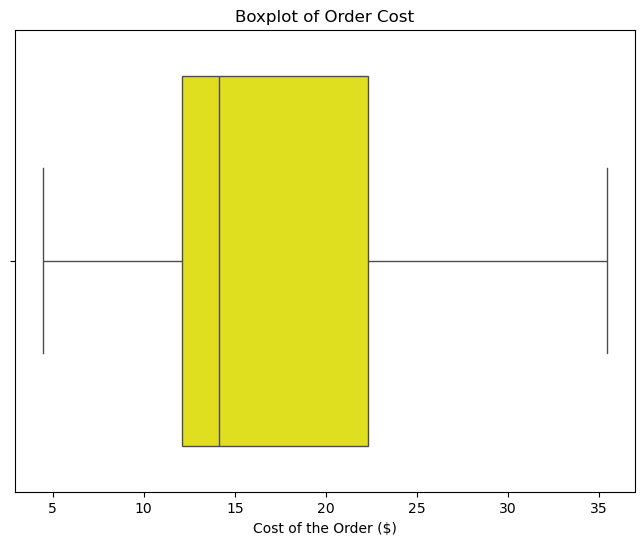

In [489]:
# Histogram for cost of the order
plt.figure(figsize=(8, 6))
sns.histplot(df['cost_of_the_order'], kde=True, color='purple', bins=15)
plt.title('Distribution of Order Cost')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Frequency')

# Boxplot for cost of the order to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['cost_of_the_order'], color='yellow')
plt.title('Boxplot of Order Cost')
plt.xlabel('Cost of the Order ($)')


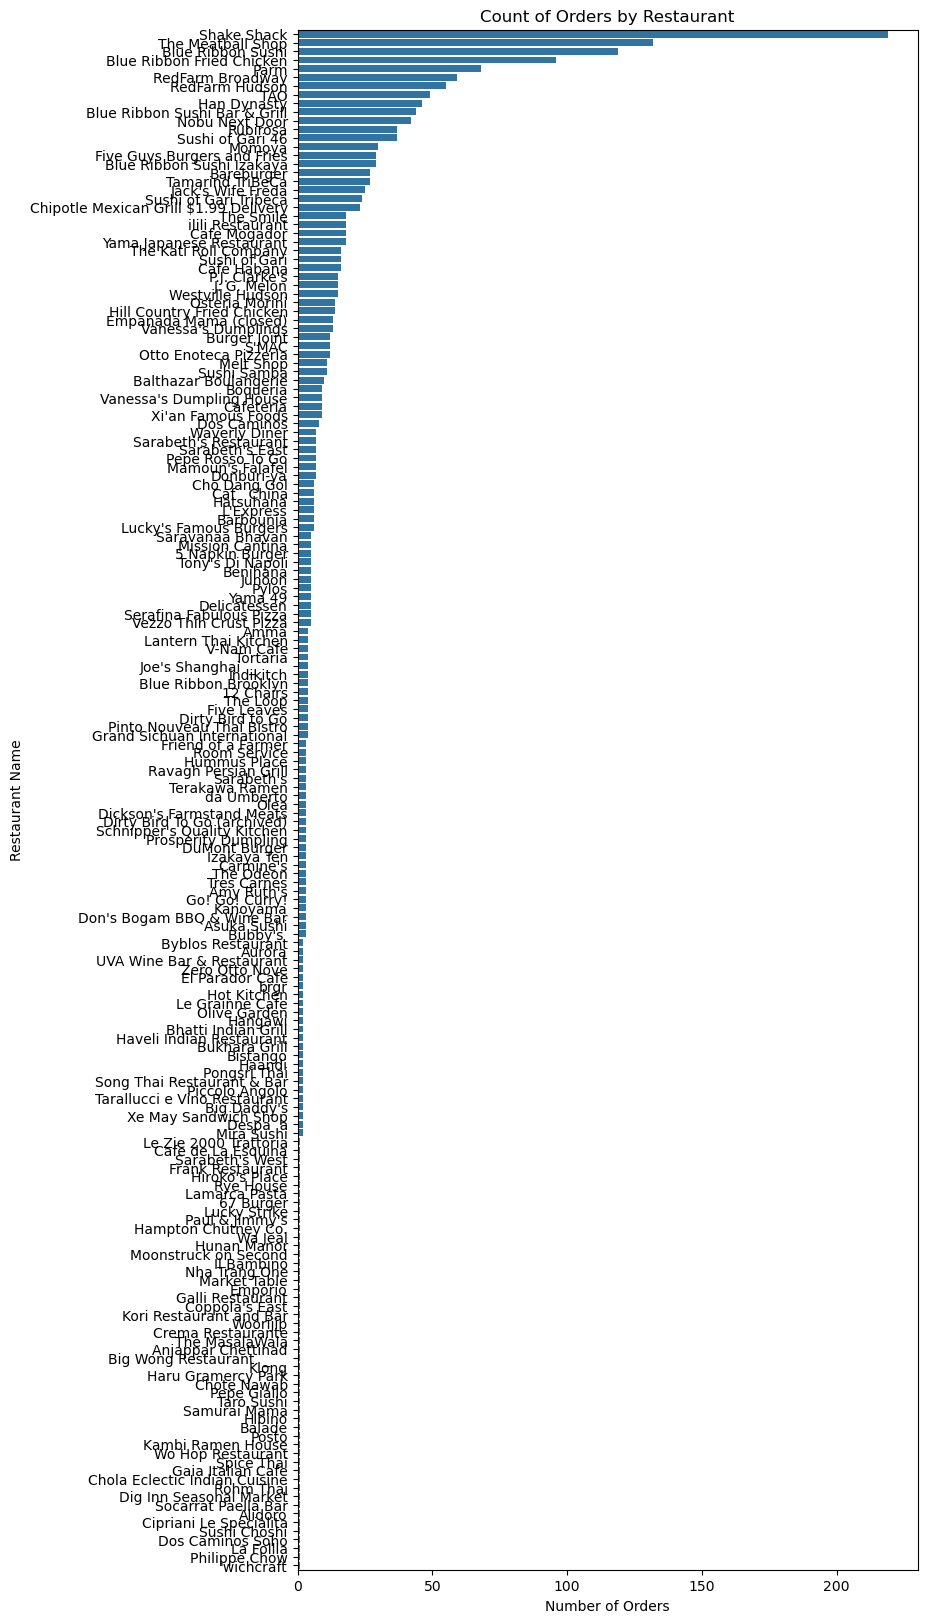

In [491]:
# Countplot for restaurant name
import matplotlib
# Checking for problematic characters (non-ASCII)
def find_non_ascii(txt):
    return ''.join([i for i in txt if ord(i) >= 128])

# Apply the function to the 'restaurant_name' column
problematic_restaurants = df['restaurant_name'].apply(find_non_ascii)
problematic_restaurants = problematic_restaurants[problematic_restaurants != '']

# Remove non-ASCII characters (replace with space or empty string)
df['restaurant_name'] = df['restaurant_name'].apply(lambda x: ''.join([i if ord(i) < 128 else ' ' for i in x]))
##got few warnings regarding fonts so i dealt with them as above. The outcome is that the restaurant_name column is now cleaned of any non-ASCII characters,
#which should help with rendering issues in our plots.
# Now we can try plotting again
plt.figure(figsize=(8, 20))
sns.countplot(y=df['restaurant_name'], order=df['restaurant_name'].value_counts().index)
plt.title('Count of Orders by Restaurant')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()

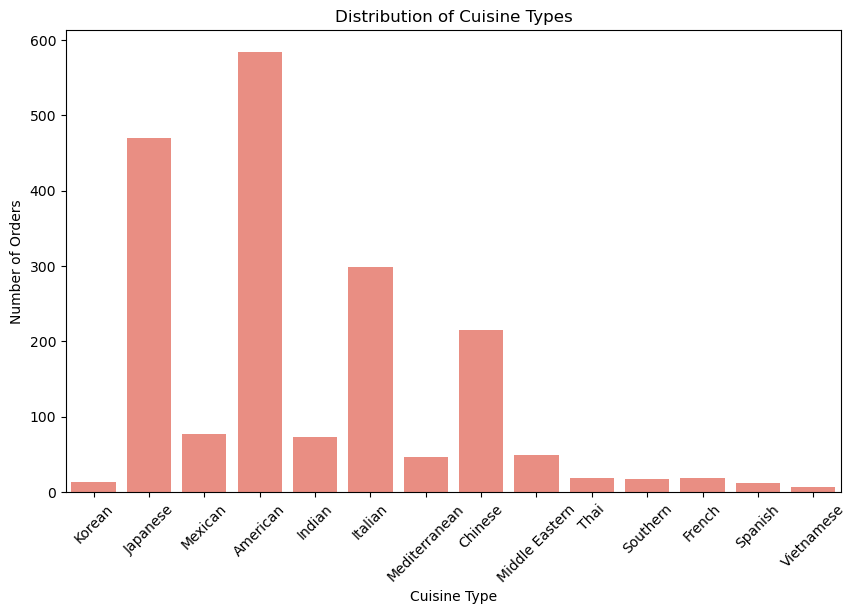

In [492]:
# Countplot for cuisine type with updated syntax
plt.figure(figsize=(10, 6))
sns.countplot(x='cuisine_type', data = df, color='salmon')
plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Number of Orders')

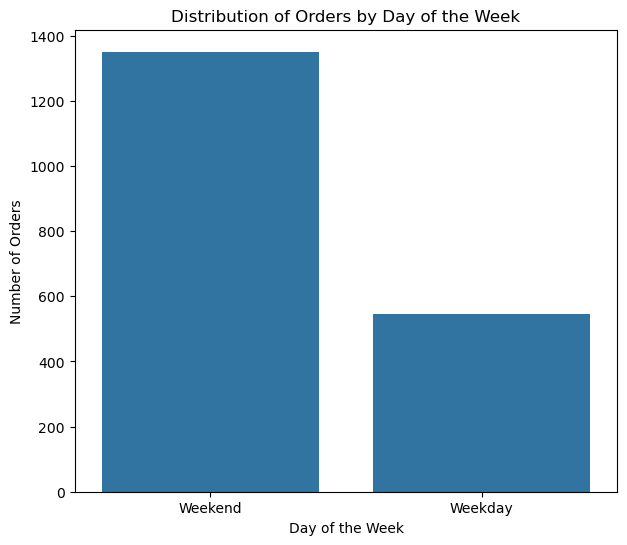

In [495]:
# Countplot for day of the week
plt.figure(figsize=(7, 6))
sns.countplot(x=df['day_of_the_week'], data=df, legend=False)
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

Text(0, 0.5, 'Number of Orders')

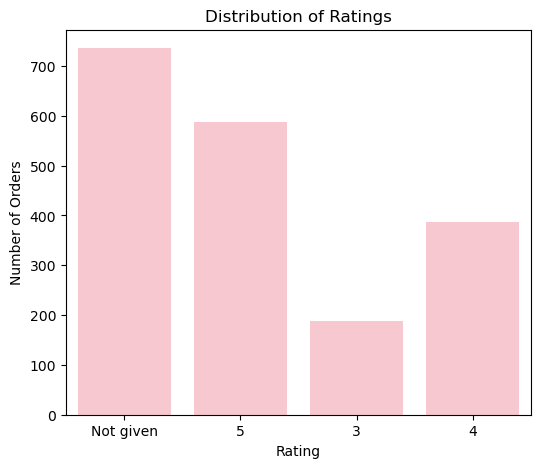

In [497]:
# Countplot for ratings
plt.figure(figsize=(6, 5))
sns.countplot(x=df['rating'],color = 'pink')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')

In [499]:
# Counting the number of orders for each restaurant
restaurant_order_counts = df['restaurant_name'].value_counts()

# top 5 restaurants with the highest number of orders
restaurant_order_counts.head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
This data highlights which restaurants have the most demand based on the number of orders, which could be useful for analysis around customer preferences, marketing strategies etc.. for these specific restaurants.

In [502]:
# Filter the data for weekends 
popular = df[df['day_of_the_week'] == 'Weekend']
#check for cuisines that operate on weekends
popular_count = popular['cuisine_type'].value_counts()
print(popular_count)
most_popular_cuisine = popular_count.idxmax()
most_popular_cuisine_count = popular_count.max()

print(f"The most popular cuisine on weekends is '{most_popular_cuisine}' with {most_popular_cuisine_count} orders.")

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64
The most popular cuisine on weekends is 'American' with 415 orders.


#### Observations:
By identifying the most popular cuisine on weekends and analyzing the distribution of orders for different cuisines, we can draw conclusions about customer preferences, peak demand periods, etc. The weekend pattern might differ from weekdays, highlighting the importance of targeted marketing and promotions.

In [505]:
# Filtering orders where the cost is greater than 20 $
orders_above_20 = df[df['cost_of_the_order'] > 20]

# Calculating the percentage of orders that cost more than 20 $
percentage_above_20 = (len(orders_above_20) / len(df)) * 100

print(f"Percentage of orders costing more than 20$: {percentage_above_20:.2f}%")

Percentage of orders costing more than 20$: 29.24%


#### Observations:
Approximately 29.24% of the orders cost more than 20 dollars, indicating that a significant portion of customers prefer to spend less than this amount. This suggests a preference for more affordable, individual meals, which may be a result of budget-conscious customers. To boost the percentage of high-value orders, restaurants could implement strategies such as offering meal bundles, discounts on larger orders, and incentives for upselling additional items like drinks or sides. Moreover, delivery services could offer free or discounted delivery for orders over $20 to encourage higher spending

In [508]:
mean_delivery_time = df['delivery_time'].mean()
print(f"The mean/avg order delivery time is {mean_delivery_time:.2f} minutes.")

The mean/avg order delivery time is 24.16 minutes.


#### Observations:
The mean delivery time tells of how quickly orders are being delivered across the entire dataset.
A lower mean delivery time could suggest efficient delivery systems, while a higher mean could indicate possible delays or inefficiencies that may need to be addressed.

In [511]:
# Group by customer_id and count the number of orders for each customer
top_customers = df.groupby('customer_id')['order_id'].count()

# Sort the customers by the number of orders in descending order
top_customers = top_customers.sort_values(ascending=False)

top_customers.head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations:
These data can help us also find how many customers are frequently visiting and help us also for marketing promotions.

### Multivariate Analysis

Text(0, 0.5, 'Average Cost of Order ($)')

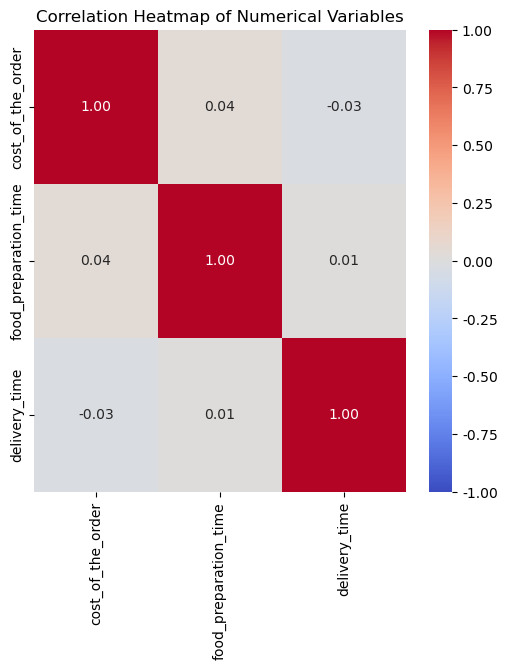

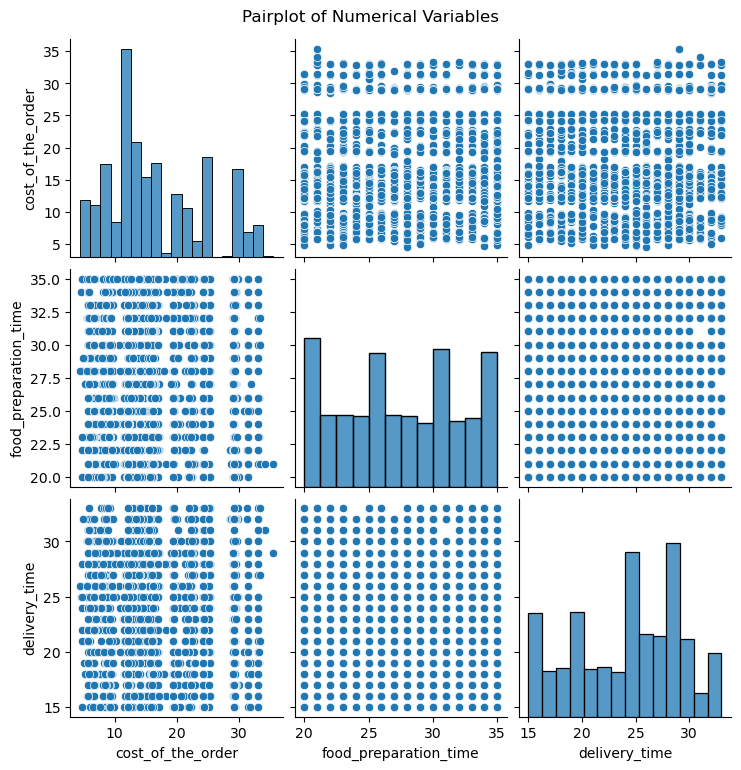

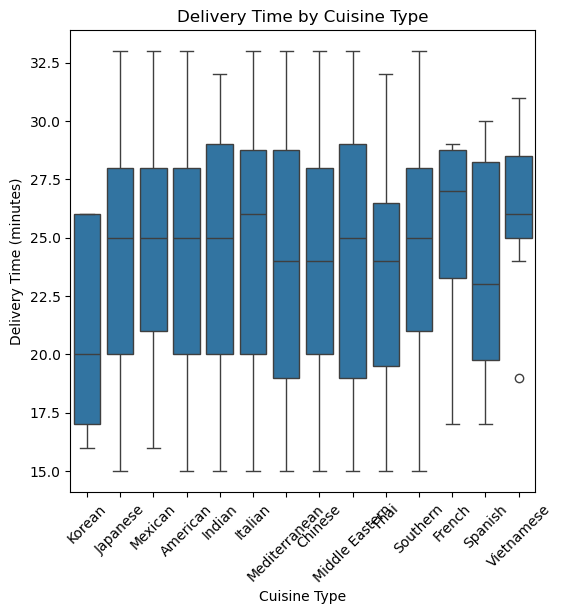

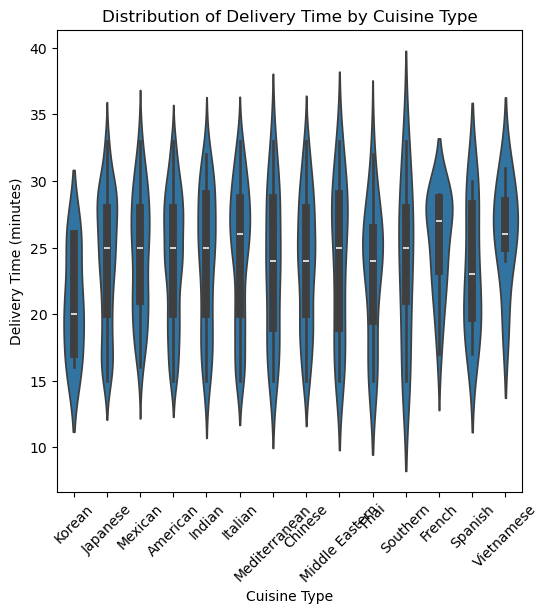

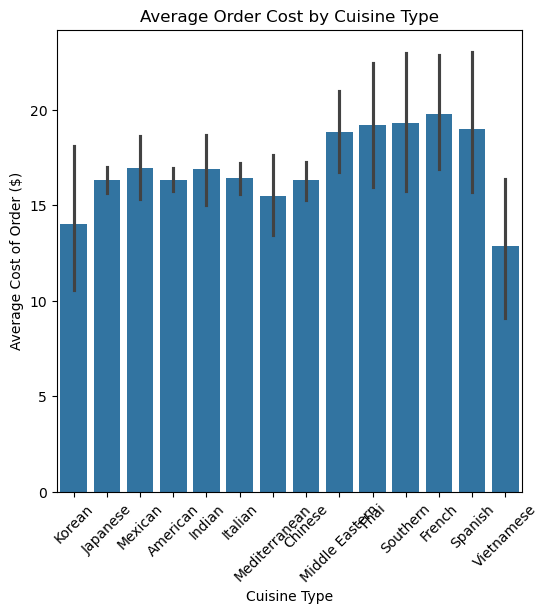

In [516]:
# Select numerical columns for correlation analysis
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')

# Pairplot to visualize relationships between numerical variables
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)

# Boxplot to check the relationship between 'delivery_time' and 'cuisine_type'
plt.figure(figsize=(6, 6))
sns.boxplot(x='cuisine_type', y='delivery_time', data=df)
plt.xticks(rotation=45)
plt.title('Delivery Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time (minutes)')

# Violin plot to check the distribution of 'delivery_time' by 'cuisine_type'
plt.figure(figsize=(6, 6))
sns.violinplot(x='cuisine_type', y='delivery_time', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Delivery Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time (minutes)')

# Bar plot to check the average 'cost_of_the_order' by 'cuisine_type'
plt.figure(figsize=(6, 6))
sns.barplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=45)
plt.title('Average Order Cost by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of Order ($)')


In [520]:
# Convert the 'rating' column to numeric, forcing errors to NaN if there are non-numeric entries
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group the data by 'restaurant_name' to calculate the number of ratings and the average rating
ratings = df.groupby('restaurant_name').agg(rating_count=('rating', 'size'), average_rating=('rating', 'mean'))

# Filter restaurants based on the criteria: more than 50 ratings and average rating greater than 4
restaurants_for_offer = ratings[(ratings['rating_count'] > 50) & (ratings['average_rating'] > 4)]

# Reset the index for better readability and display the results
restaurants_for_offer = restaurants_for_offer.reset_index()

# Print the restaurant names, rating counts, and average ratings
print(restaurants_for_offer[['restaurant_name', 'rating_count', 'average_rating']])


             restaurant_name  rating_count  average_rating
0  Blue Ribbon Fried Chicken            96        4.328125
1          Blue Ribbon Sushi           119        4.219178
2                       Parm            68        4.128205
3           RedFarm Broadway            59        4.243902
4             RedFarm Hudson            55        4.176471
5                Shake Shack           219        4.278195
6          The Meatball Shop           132        4.511905


#### Observations:
These insights suggest that by targeting popular and well-reviewed restaurants, the company can maximize the impact of its promotional campaigns and generate more positive customer engagement.

In [524]:
# Define the revenue calculation function
def cal_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25  
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15  
    else:
        return 0  

# Apply the revenue calculation function to each row
df['revenue'] = df.apply(cal_revenue, axis=1)

# Calculating the total revenue
total_revenue = df['revenue'].sum()

print(f"Total Net Revenue generated by the company: ${total_revenue:.2f}")

Total Net Revenue generated by the company: $6166.30


#### Observations:
The company’s revenue is closely tied to the size of the orders, with larger orders making a much greater contribution to the overall revenue. To boost revenue further, the company could focus on increasing the average order value, especially by encouraging customers to place orders above $20.

In [527]:
# Calculate the total time for each order (preparation time + delivery time)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Find the orders that take more than 60 minutes
orders_above_60 = df[df['total_time'] > 60]

# Calculate the percentage of orders that take more than 60 minutes
percentage_above_60 = (orders_above_60.shape[0] / df.shape[0]) * 100


print(f"Percentage of orders taking more than 60 minutes to deliver: {percentage_above_60:.2f}%")


Percentage of orders taking more than 60 minutes to deliver: 10.54%


#### Observations:
The percentage of orders taking more than 60mins to be delivered serves as a strong indicator of the efficiency of the restaurant's food preparation and delivery processes. A high proportion of delayed orders suggests that certain areas of the workflow may require improvement. By addressing these inefficiencies, the company can enhance service quality, increase customer satisfaction, and potentially boost profitability by ensuring faster and more reliable deliveries.

In [530]:
# Create a new column to classify orders as 'Weekday' or 'Weekend'
df['week_type'] = df['day_of_the_week'].apply(lambda x: 'Weekend' if x in 'Weekend' else 'Weekday')

# Calculate the mean delivery time for both Weekdays and Weekends
m_delivery_time = df.groupby('week_type')['delivery_time'].mean()

print(m_delivery_time)


week_type
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
This analysis could help the company understand delivery patterns and adjust staffing, optimize routes, or even offer incentives to encourage faster deliveries during peak periods.

### Recommendations to Improve the Business

Based on the insights, the following recommendations aim to enhance the company’s operations, boost customer satisfaction and drive revenue growth

1. Improve Delivery Times:

To address longer delivery times on weekends, consider hiring additional delivery drivers or optimizing routes during peak hours.
Streamlining coordination between the kitchen and delivery teams to reduce delays. Implementing real-time tracking for food preparation and delivery can help improve efficiency.
Introduce delivery time guarantees or offer discounts for delays to better manage customer expectations and enhance satisfaction.

2. Optimize Menu and Promotions:

Leverage insights into popular cuisines on weekends to target marketing campaigns effectively. For instance, offering discounts or bundle deals for popular Encouraging customers to add more items to their orders, especially those near the $20 threshold like promoting larger meal packages or add-ons can help increase the average order value and overall profitability.

3. Enhance Customer Feedback and Ratings:

Address the issue of missing ratings by implementing a follow-up system (via email or SMS) to prompt customers to leave feedbacks.
Actively respond to both positive and negative reviews to demonstrate commitment to customer satisfaction and build loyalty.
Incentivize Reviews: Encourage customers to leave ratings by offering small incentives, such as discounts on future orders.

4. Target High-Value Orders:

Since higher-value orders (over $20) contribute more to revenue, implement strategies to encourage larger purchases, such asOffering discounts or special deals on orders above a certain amount.
Promoting combo meals or bundle options that incentivize customers to order more or adding a complementary food item to the order above threshold.
Implement loyalty programs that reward customers based on order size or frequency, fostering repeat business and higher overall sales.

5. Reduce Food Wastage and Optimize Grocery Spending:

Analyze customer order patterns to identify which dishes are most popular on specific days of the week. This data can inform grocery procurement strategies, ensuring you stock up on high-demand items for peak days, reducing over-purchasing and food waste.

6. Promotions for Top Customers:

Identify the top few customers who place the most orders and Offer them exclusive promotions or discounts to show appreciation for their loyalty. This could also lead to word-of-mouth marketing, encouraging others to order more.
Use these top customers’ purchase history to offer personalized discounts or recommendations, further increasing order frequency and enhancing their customer experience.

7. Operational Improvements:

Consider implementing more advanced analytics to track key performance metrics such as delivery times, order volume, and customer satisfaction. Real-time data can help make adjustments on the fly, preventing delays and improving overall service quality.
Invest in AI-powered tools to optimize order tracking, delivery route planning, and demand forecasting. This will help better allocate resources during peak hours and improve operational efficiency.

### Conclusions:

The company has significant potential to strengthen its operations and customer experience by prioritizing improvements in delivery efficiency, refining its menu and promotional strategies, and utilizing customer data for more personalized marketing and loyalty initiatives. By addressing key operational challenges, such as reducing delivery times, the company can quickly enhance customer satisfaction and loyalty. Furthermore, focusing on increasing average order values and rewarding high-value customers will not only boost short-term revenue but also create a more loyal customer base for sustained growth and long-term success.